# Arsenic Contamination Example

In [296]:
from IPython.display import display, HTML
display(HTML('<a target="_blank" href="https://colab.research.google.com/github/WaterFutures/EPyT-Flow/blob/main/docs/examples/arsenic_contamination.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>'))

This example demonstrates how to add a simple arsenic contamination event to a scenario.

[EPyT-Flow](https://github.com/WaterFutures/EPyT-Flow) is available on [PyPI](https://pypi.org/project/epyt-flow/) and can be installed via `pip install epyt-flow`:

In [297]:
%pip install epyt-flow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [298]:
import numpy as np
from epyt_flow.data.benchmarks import load_leakdb_scenarios
from epyt_flow.simulation import ScenarioSimulator, EpanetConstants, ScenarioConfig
from epyt_flow.simulation.events import SpeciesInjectionEvent
from epyt_flow.utils import to_seconds
from epyt_flow.topology import unitscategoryid_to_str, UNITS_SIMETRIC, UNITS_USCUSTOM

from epyt_flow.simulation import ScenarioSimulator
from epyt_flow.visualization import ScenarioVisualizer

Create a new scenario based on the first Net1 [LeakDB](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.data.benchmarks.html#module-epyt_flow.data.benchmarks.leakdb) scenario -- we also add an additional EPANET-MSX configuration file `arsenic_contamination.msx`:

In [299]:
config, = load_leakdb_scenarios(scenarios_id=["1"], use_net1=True, verbose=False)
config = ScenarioConfig(scenario_config=config,
                        f_msx_in="arsenic_contamination.msx")

In [300]:
sim = ScenarioSimulator(scenario_config=config)

Overview of the network

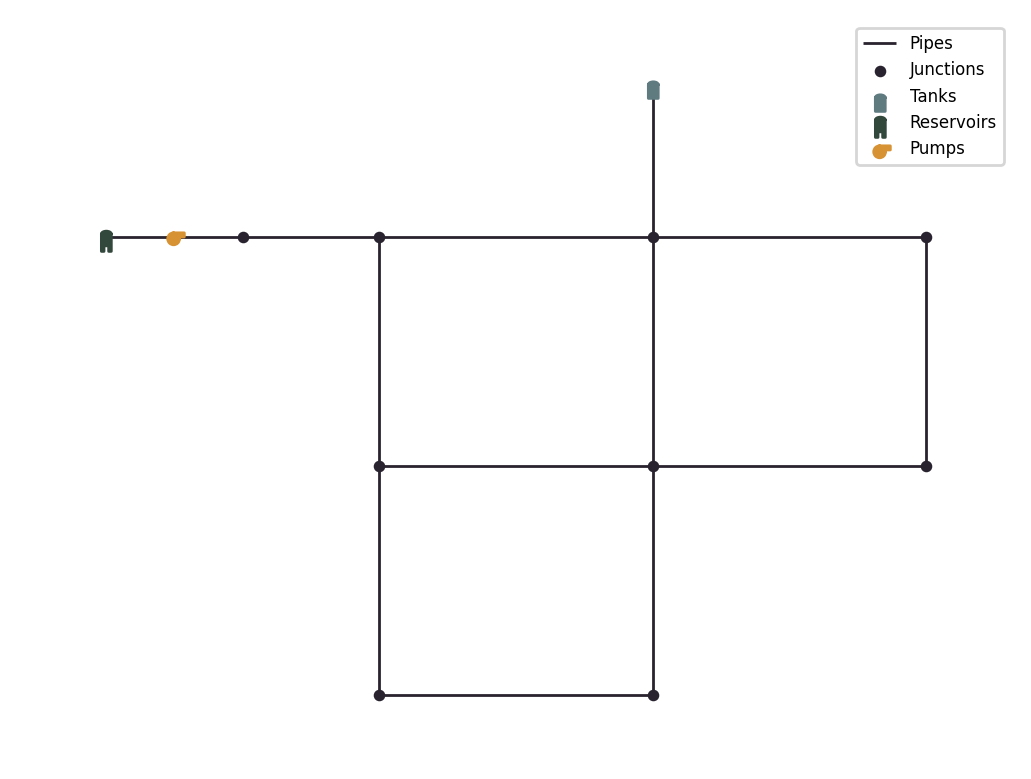

In [301]:
sim.plot_topology()

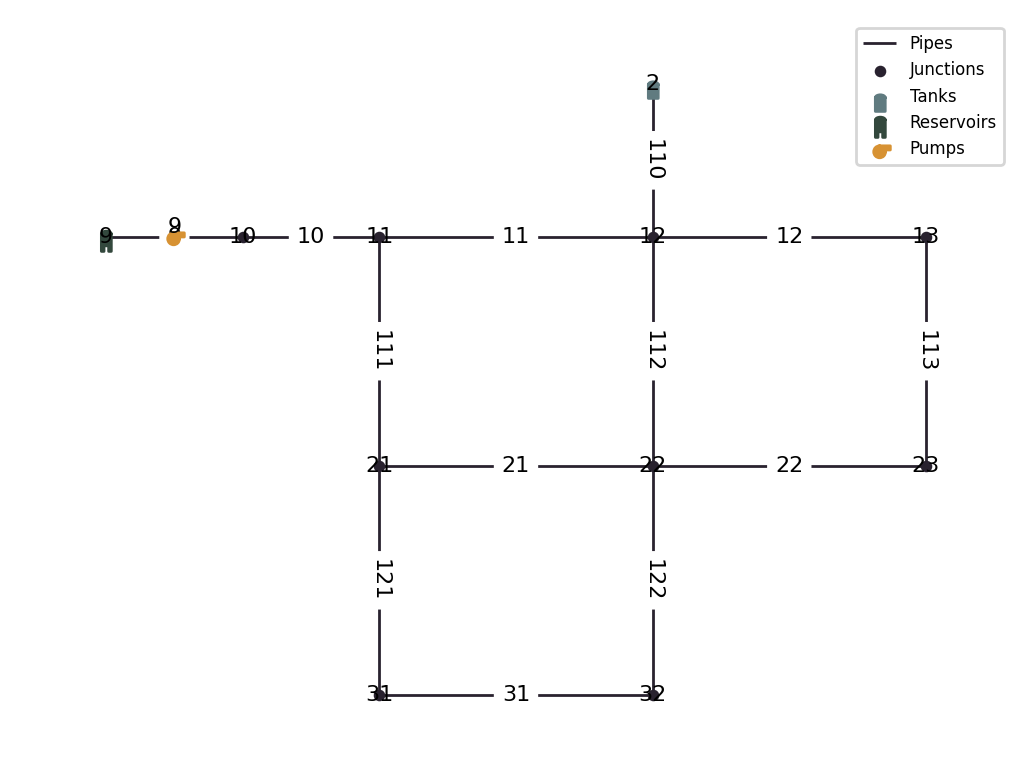

In [302]:
vis = ScenarioVisualizer(sim)
vis.add_labels('all')
vis.show_plot()

In [303]:
topo = sim.get_topology()

print("Nodes:", topo.nodes)

print("Links:", topo.edges)

sim.get_quality_model()

Nodes: ['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2']
Links: [('10', '11'), ('10', '9'), ('11', '12'), ('11', '21'), ('12', '13'), ('12', '2'), ('12', '22'), ('13', '23'), ('21', '22'), ('21', '31'), ('22', '23'), ('22', '32'), ('31', '32')]


{'code': [1, 0],
 'type': 1,
 'chemical_name': 'Chlorine',
 'units': 4,
 'trace_node_id': ''}

In [304]:
new_topo = topo.convert_units(UNITS_SIMETRIC)

all_pipes = new_topo.get_all_pipes()
print(f"Nombre de pipes: {len(all_pipes)}")


for pipe_id, (node_start, node_end) in all_pipes:
    pipe_info = new_topo.get_link_info(pipe_id)
    
    print(f"\n=== Pipe {pipe_id} ===")
    print(f"Relie: {node_start} -> {node_end}")
    print(f"Diamètre: {pipe_info.get('diameter')}") # given in millimeters
    print(f"Longueur: {pipe_info.get('length')}") # given in meters
    print(f"Rugosité: {pipe_info.get('roughness')}")
    print(f"Statut initial: {pipe_info.get('status')}")
    print(f"Toutes les infos: {pipe_info}")

Nombre de pipes: 12

=== Pipe 10 ===
Relie: 10 -> 11
Diamètre: 457.20001220703125
Longueur: 3209.5439453125
Rugosité: None
Statut initial: None
Toutes les infos: {'nodes': ['10', '11'], 'type': 1, 'diameter': 457.20001220703125, 'length': 3209.5439453125, 'roughness_coeff': 100.0, 'bulk_coeff': -0.5, 'wall_coeff': -1.0, 'loss_coeff': 0.0}

=== Pipe 11 ===
Relie: 11 -> 12
Diamètre: 355.6000061035156
Longueur: 1609.343994140625
Rugosité: None
Statut initial: None
Toutes les infos: {'nodes': ['11', '12'], 'type': 1, 'diameter': 355.6000061035156, 'length': 1609.343994140625, 'roughness_coeff': 100.0, 'bulk_coeff': -0.5, 'wall_coeff': -1.0, 'loss_coeff': 0.0}

=== Pipe 12 ===
Relie: 12 -> 13
Diamètre: 254.0
Longueur: 1609.343994140625
Rugosité: None
Statut initial: None
Toutes les infos: {'nodes': ['12', '13'], 'type': 1, 'diameter': 254.0, 'length': 1609.343994140625, 'roughness_coeff': 100.0, 'bulk_coeff': -0.5, 'wall_coeff': -1.0, 'loss_coeff': 0.0}

=== Pipe 21 ===
Relie: 21 -> 22
Diam

In [305]:

scenario_config = sim.get_scenario_config()
print(scenario_config)


f_inp_in: C:\Users\eline\AppData\Local\Temp\Net1_LeakDB_ID=1.inp f_msx_in: arsenic_contamination.msx general_params: {'hydraulic_time_step': 1800, 'quality_time_step': 300, 'reporting_time_step': 1800, 'simulation_duration': 31536000, 'flow_units_id': 8, 'quality_model': {'code': [1, 0], 'type': 1, 'chemical_name': 'Chlorine', 'units': 4, 'trace_node_id': ''}, 'demand_model': {'type': 1, 'pressure_min': 0.0, 'pressure_required': 0.10000000149011612, 'pressure_exponent': 0.5}} sensor_config: nodes: ['10', '11', '12', '13', '21', '22', '23', '31', '32', '9', '2'] links: ['10', '11', '12', '21', '22', '31', '110', '111', '112', '113', '121', '122', '9'] valves: [] pumps: ['9'] tanks: ['2'] bulk_species: ['Chlorine', 'AsIII'] surface_species: [] node_id_to_idx: {'10': 0, '11': 1, '12': 2, '13': 3, '21': 4, '22': 5, '23': 6, '31': 7, '32': 8, '9': 9, '2': 10} link_id_to_idx: {'10': 0, '11': 1, '12': 2, '21': 3, '22': 4, '31': 5, '110': 6, '111': 7, '112': 8, '113': 9, '121': 10, '122': 11, 

Set simulation duration to 21 days by calling [set_general_parameters()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator.set_general_parameters) -- note that all time durations have to be stated in seconds, the function [to_seconds()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.html#epyt_flow.utils.to_seconds) can convert minutes/hours/days to seconds:

In [306]:
sim.set_general_parameters(simulation_duration=to_seconds(days=21))

Place some chlorine sensors and also keep track of the contaminant:

In [307]:
cl_sensor_locations = ["11", "12", "13", "21", "22", "23", "31", "32"] # all nodes except the source node "1" and the node 10 because not reachable
all_nodes = sim.sensor_config.nodes

sim.set_bulk_species_node_sensors({"Chlorine": cl_sensor_locations,
                                   # Also: Keep track of the contaminant
                                   "AsIII": all_nodes})   # Arsenite

Create a 1-day contamination event of an Arsenite injection (100 mg/day) at node "22" by creating a new instance of the [SpeciesInjectionEvent](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.events.html#epyt_flow.simulation.events.quality_events.SpeciesInjectionEvent) class and calling [add_system_event()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator.add_system_event):

In [308]:
contamination_event = SpeciesInjectionEvent(species_id="AsIII", node_id="22",
                                            profile=np.array([1000000]), # pattern d'injection 
                                            source_type=EpanetConstants.EN_MASS,
                                            start_time=to_seconds(days=3),
                                            end_time=to_seconds(days=4))

sim.add_system_event(contamination_event)

Run the entire simulation by calling [run_simulation()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator.run_simulation):

In [309]:
scada_data = sim.run_simulation()

c:\Users\eline\Documents\Documents\university\Master 2\memoire\AI-for-Drinking-Water\env\Lib\site-packages\epyt_flow\simulation\scenario_simulator.py:2821: UserWarning: Failed to remove temporary file 'C:\Users\eline\AppData\Local\Temp\epytflow_MSX_fbfe35dc-2463-4468-8791-15d6b99e4832.hyd'
  warnings.warn(f"Failed to remove temporary file '{hyd_export}'")


Inspect simulation results -- i.e. plot sensor readings over time by calling the [plot_bulk_species_node_concentration](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.scada.html#epyt_flow.simulation.scada.scada_data.ScadaData.plot_bulk_species_node_concentration) function:

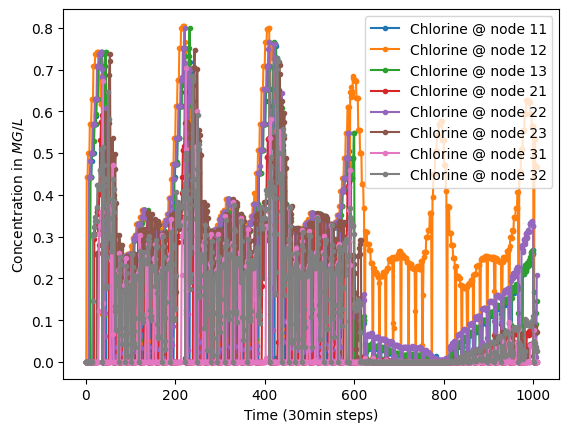

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [310]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": cl_sensor_locations})
# regarder aux noeuds séparémment

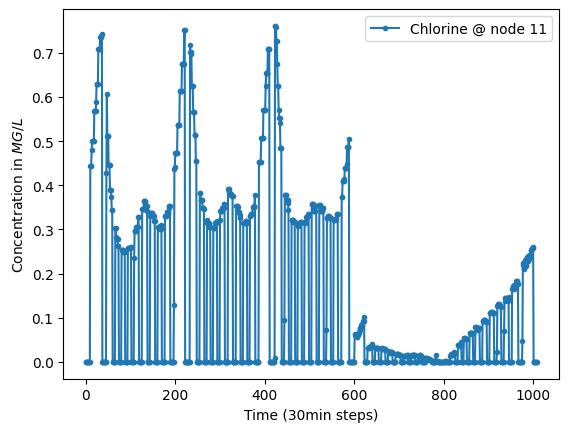

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [311]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["11"]})

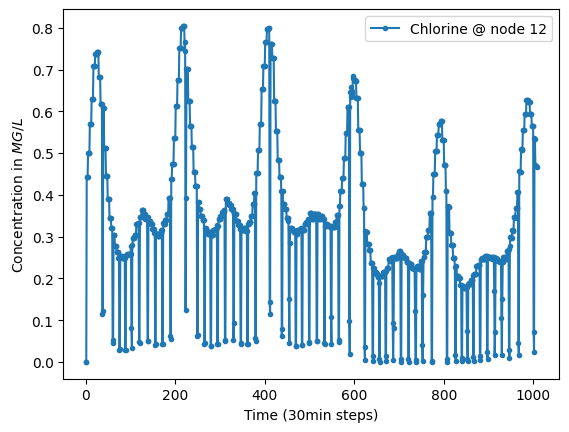

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [312]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["12"]})

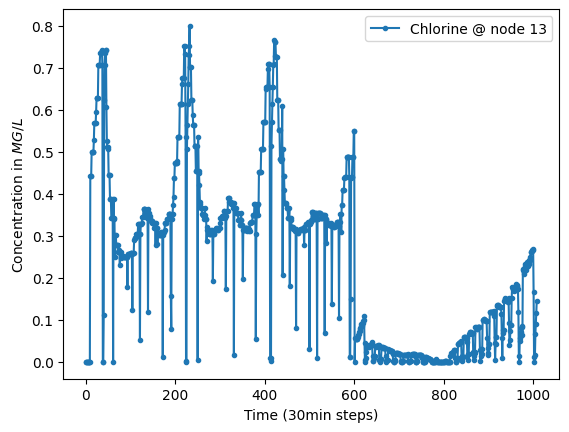

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [313]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["13"]})

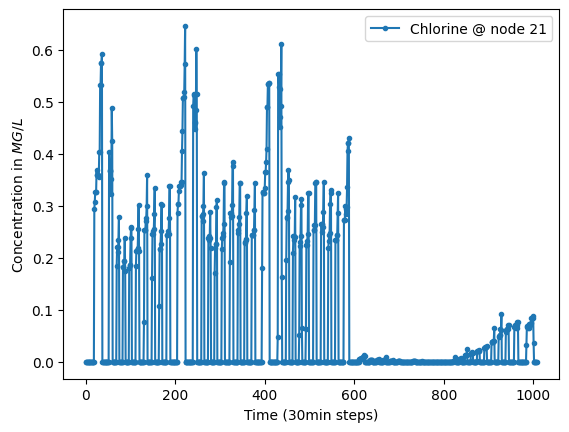

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [314]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["21"]})

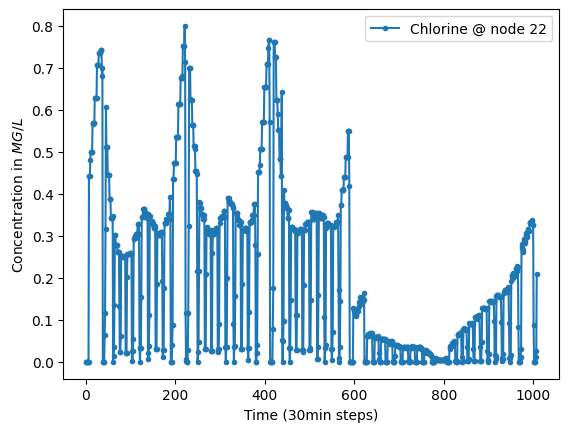

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [315]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["22"]})

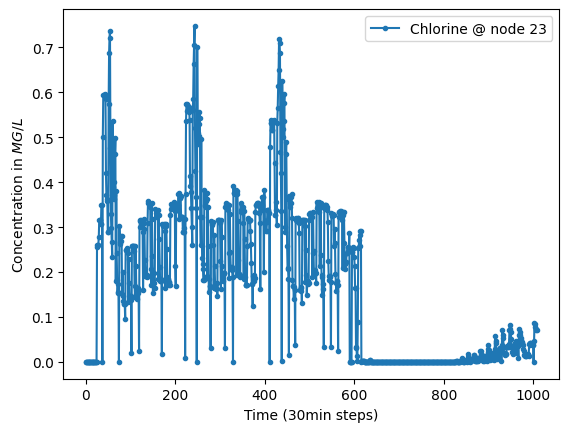

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [316]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["23"]})

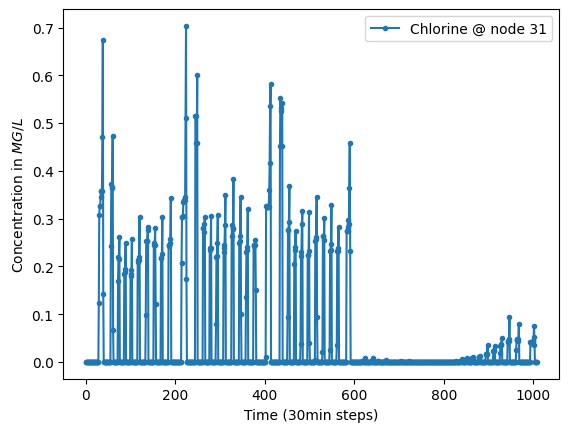

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [317]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["31"]})

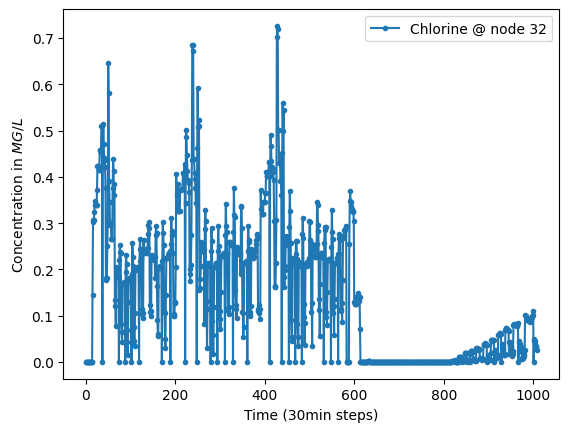

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [318]:
scada_data.plot_bulk_species_node_concentration({"Chlorine": ["32"]})

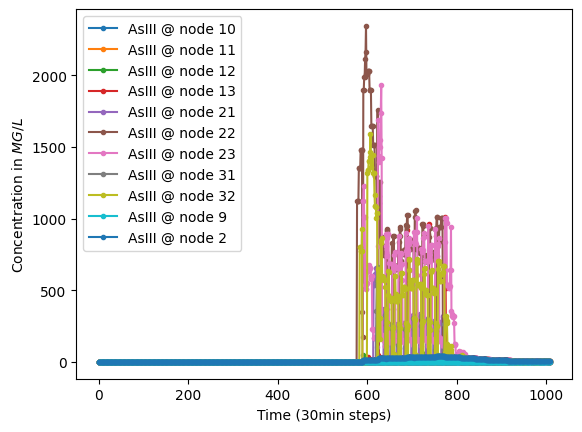

<Axes: xlabel='Time (30min steps)', ylabel='Concentration in $MG/L$'>

In [319]:
scada_data.plot_bulk_species_node_concentration({"AsIII": all_nodes})

In [320]:
df = scada_data.to_pandas_dataframe(export_raw_data=False)
df.to_csv("scada_data_million_contamination.csv", index=False)

Do not forget to close the simulation by calling [close()](https://epyt-flow.readthedocs.io/en/stable/epyt_flow.simulation.html#epyt_flow.simulation.scenario_simulator.ScenarioSimulator.close):

In [321]:
sim.close()